<h1 align="center">MSIN0097: Predictive Analytics</h1>
<h1 align="center">Individual Coursework</h1>
<h1 align="center">House Price Prediction</h1>
<br><br><br>
<h3 align="center">Word Count: 1046</h3>
 <h3 align="center">March 2021</h3>

<h3>Table of Contents</h3>

* [1. Introduction](#1.-Introduction)
* [2. Setup](#2.-Setup)
* [3. Get the data](#3.-Get-the-data)
    * [3.1 Data Preview](#3.1-Data-Preview)
    * [3.2 Stratified Sampling](#3.2-Stratified-Sampling)
* [4. Exploratory Data Analysis](#4.-Exploratory-Data-Analysis)
* [5. Prepare the data](#5.-Prepare-the-data)
* [6. Model Training](#6.-Model-Training)
* [7. Fine-Tune the System](#7.-Fine-Tune-the-System)
* [8. Conclusion](#8.-Conclusion)
* [Reference](#Reference)
* [Appendix](#Appendix)
* [Repository Link](#Repository-Link)

# 1. Introduction 

House sales are one of the vital economic pillars in America. Since the 2008 financial crisis's dire bursting, the real estate industry entered a favourable growth period, and 5.52 million houses were selling in 2020, signalling a confident prospect in the future economy. (Existing home sales in the U.S. 2005-2021 | Statista, 2021) Pricing represents the value given to an item and can be influenced by various factors, such as product cost. Hence, I selected the house sales dataset from 2014 to 2015 in King County, Washington, focusing on one specific area and period, to explore how different elements can influence house price through regression analysis and finally determine the best predictive model for price setting. 

I have added teaching teams as administrtor on faculty and attached the link of reposotory in the end.

# 2. Setup

In [2]:
# display full output instead of the last line of result 

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# import funcion

import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import hashlib
from hashlib import md5
!pip install scipy
!pip install sklearn
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from random import randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.       

# 3. Get the data

## 3.1 Data Preview

In [4]:
# import dataset

KcHouse_sales = pd.read_csv("kc_house_data.csv", encoding= 'unicode_escape')
KcHouse_sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
KcHouse_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
# check categorical variable 

KcHouse_sales["waterfront"].value_counts()

0    21434
1      163
Name: waterfront, dtype: int64

**Comments:**

The waterfront is a binary variable from the dataset source description in which 1 represents the property with a waterfront and 0 is not. It is better to have a preview of the categorical ratio in the waterfront.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6fd1355f40>,
      dtype=object)

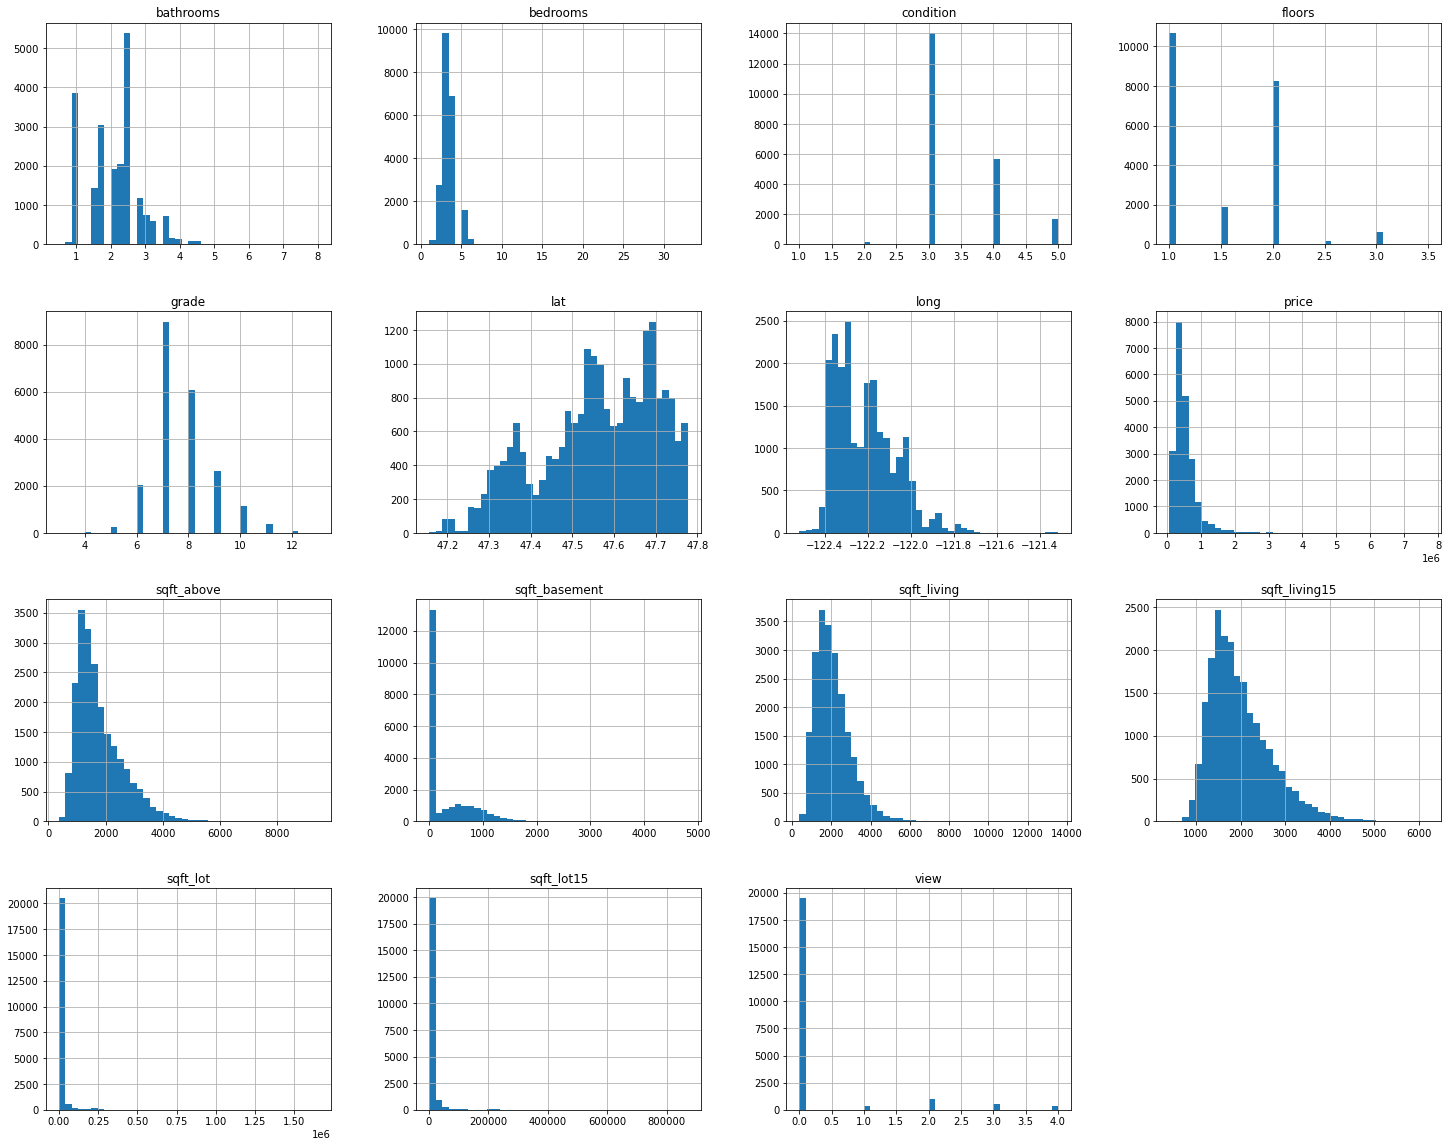

In [7]:
# remove redundant features and categorial variable to give a straightforward view of important vairables' distributions

KcHouse_sales_main_attributes = KcHouse_sales.drop(["id", "date", "yr_built", "yr_renovated", "zipcode", "waterfront"], axis = 1)
KcHouse_sales_main_attributes.hist(bins = 40,figsize=(25,20))
plt.show()

**Comments:**

Only the frequencies of sqft_living 15 look equally distributed, as the data of price, sqft_living, long, and sqft_above are skewed right with long tails indicating their means are greater than the medians.


In [8]:
# guanrantee the notebook's outputs identical at every run

np.random.seed(42)

In [9]:
# show the numbers of sample in data split

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(KcHouse_sales, 0.2)
print(len(train_set), "train +", len(test_set), "test")

17278 train + 4319 test


**Comments:**

The ratio of 20:80 achieves the best prediction accuracy because 30:70 causes a large difference between rooe mean square error on the training set and cross-validation RMSE, meaning greater overfitting in training data.

In [10]:
# produce a consistent subset by hashing the identifier

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

def split_train_test_by_id(data,test_ratio,id_column,hash=md5): 
    ids = data[id_column] 
    in_test_set=ids.apply(lambda id_:test_set_check(id_,test_ratio,hash)) 
    return data.loc[~in_test_set],data.loc[in_test_set] 


In [11]:
# adds an `index` column

KcHouse_sales_with_id = KcHouse_sales.reset_index()  
train_set, test_set = split_train_test_by_id(KcHouse_sales_with_id, 0.2, "index")

## 3.2 Stratified Sampling

I use sqft_living as a unique identifier as it has the strongest positive correlation with the target variable and well uniform distribution. Most values are concentrated between 900 to 3000, grouping more than 3000 and stratifying the sqft_living values into five segments. Compared with random sampling, stratified sampling has the closest distribution in each layer to the original dataset.

In [12]:
# correlation between price and main features

corr_matrix = KcHouse_sales_main_attributes.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
floors           0.256804
sqft_lot         0.089876
sqft_lot15       0.082845
condition        0.036056
long             0.022036
Name: price, dtype: float64

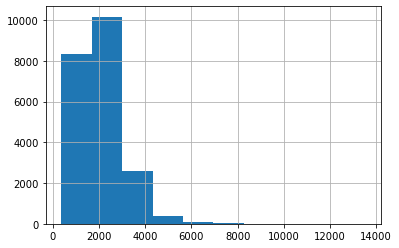

In [13]:
# sqft_living histogram

KcHouse_sales["sqft_living"].hist()

In [14]:
# split into 5 groups

KcHouse_sales["sqft_living_cate"] = pd.cut(KcHouse_sales["sqft_living"],
                               bins=[0., 750., 1500., 2250., 3000., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [15]:
KcHouse_sales["sqft_living_cate"].value_counts()

3    7696
2    6012
4    4502
5    3080
1     307
Name: sqft_living_cate, dtype: int64

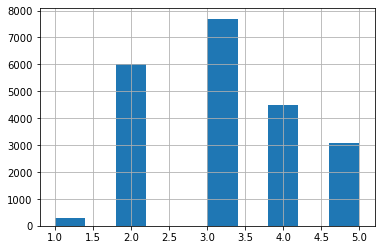

In [16]:
# new histogram after splitting

KcHouse_sales["sqft_living_cate"].hist()

In [17]:
# have a look with "sqft_living_cate" column

KcHouse_sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living_cate
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,4
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,3
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,3


In [18]:
# stratified sampling 

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(KcHouse_sales, KcHouse_sales["sqft_living_cate"]):
    strat_train_set = KcHouse_sales.loc[train_index]
    strat_test_set = KcHouse_sales.loc[test_index]

In [19]:
# sample proportion of each group in stratified sampling 
strat_test_set["sqft_living_cate"].value_counts() / len(strat_test_set)

3    0.356250
2    0.278472
4    0.208565
5    0.142593
1    0.014120
Name: sqft_living_cate, dtype: float64

In [20]:
# random sampling

train_set, test_set = train_test_split(KcHouse_sales, test_size=0.2, random_state=42)

In [21]:
# sample proportion of each group in random sampling 

test_set["sqft_living_cate"].value_counts() / len(test_set)

3    0.362731
2    0.281250
4    0.203241
5    0.136343
1    0.016435
Name: sqft_living_cate, dtype: float64

In [22]:
# sample proportion of each group in overall data 

KcHouse_sales["sqft_living_cate"].value_counts() / len(KcHouse_sales)

3    0.356346
2    0.278372
4    0.208455
5    0.142612
1    0.014215
Name: sqft_living_cate, dtype: float64

In [23]:
# comapre the test sets of stratified and random sample with overall dsitribution

def sqft_living_cate_proportions(data):
    return data["sqft_living_cate"].value_counts() / len(data)

compare_proportions = pd.DataFrame({
    "Overall": sqft_living_cate_proportions(KcHouse_sales),
    "Stratified": sqft_living_cate_proportions(strat_test_set),
    "Random": sqft_living_cate_proportions(test_set),
}).sort_index()
compare_proportions["Strat. %error"] = 100 * compare_proportions["Stratified"] / compare_proportions["Overall"] - 100
compare_proportions["Rand. %error"] = 100 * compare_proportions["Random"] / compare_proportions["Overall"] - 100

compare_proportions

,Overall,Stratified,Random,Strat. %error,Rand. %error
1,0.014215,0.014120,0.016435,-0.665264,15.619119
2,0.278372,0.278472,0.281250,0.036004,1.033870
3,0.356346,0.356250,0.362731,-0.026881,1.791993
4,0.208455,0.208565,0.203241,0.052739,-2.501327
5,0.142612,0.142593,0.136343,-0.013889,-4.396397


In [24]:
for set in (strat_train_set, strat_test_set):
    set.drop("sqft_living_cate", axis = 1, inplace = True)

In [25]:
# "sqft_cate" was removed

strat_train_set.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11856,1231000640,9/11/2014,290000.0,2,1.0,960,4000,1.0,0,0,...,6,960,0,1918,0,98118,47.5554,-122.267,1210,4000
1324,9126100550,5/13/2014,625000.0,3,3.5,1810,1846,2.0,0,0,...,8,1440,370,2009,0,98122,47.6070,-122.305,1480,3600
2925,8649401270,4/30/2015,167000.0,1,1.0,780,10235,1.5,0,0,...,6,780,0,1989,0,98014,47.7130,-121.315,930,10165
3234,2296500131,12/16/2014,739000.0,5,4.0,4660,9900,2.0,0,2,...,9,2600,2060,1979,0,98056,47.5135,-122.200,3380,9900
16230,6012500170,10/7/2014,712500.0,5,2.0,2280,5400,1.5,0,0,...,7,1340,940,1947,0,98105,47.6674,-122.279,1770,5000


# 4. Exploratory Data Analysis

In [26]:
# use training set to data visulisation  

KcHouse_sales = strat_train_set.copy()

(<Figure size 792x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6fcd617f40>)

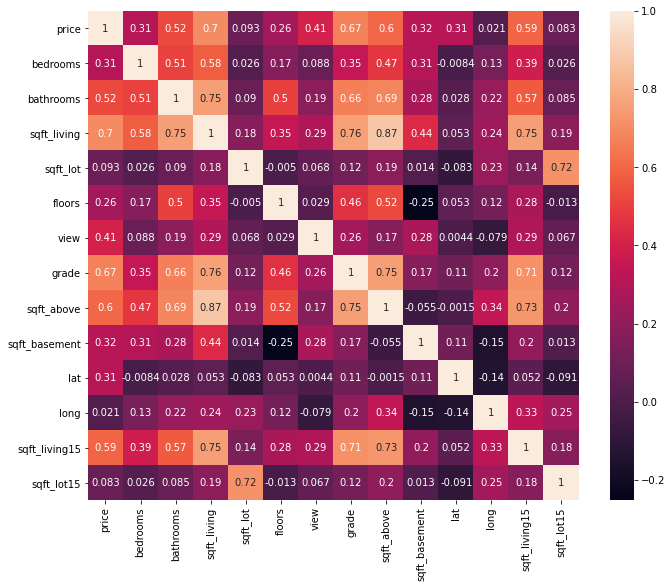

In [27]:
# heatmap between attributes

KcHouse_sales_main_attributes = KcHouse_sales.drop(["id", "date", "yr_built", "yr_renovated", "zipcode", "waterfront", "condition"], axis = 1)
corr_matrix1 = KcHouse_sales_main_attributes.corr()
plt.subplots(figsize = (11, 9))
sns.heatmap(corr_matrix1, annot = True)
plt.show() 

**Comments:**

Data visualisation mainly focuses on the features which highly correlate with the price determined by the heat map. Interestingly, sqft_above, the square footage of a house apart from the basement, is critical for house pricing, implying that buyers care about the area of living and the entire house space on the ground. People rely heavily on grade ratings to set prices as well in King County. 

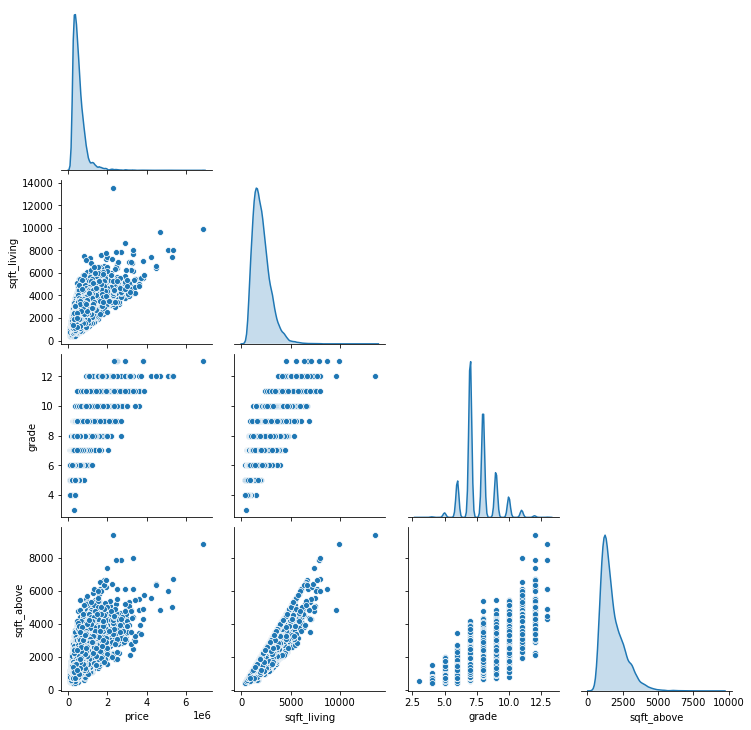

In [28]:
# pairplots between price and highly correlated vairbales

sns.pairplot(KcHouse_sales[["price", "sqft_living", 
                            "grade", "sqft_above"]], diag_kind = "kde", corner=True)

**Comments:**

For a clear display of the potential relationship between different variables, we cut the upper triangle charts. Grade tends to correlate with sqft_living and sqft_above positively. The larger the square footage of living and house's overground space, the more the scatters aggregate towards right at the higher grade.



<Figure size 576x504 with 0 Axes>

Text(0.5, 0.98, 'House Prices against Sqaure Footage of Living')

Text(0.5, 21.706250000000026, 'Square Living')

Text(26.11312934027778, 0.5, 'House Price')

<Figure size 576x504 with 0 Axes>

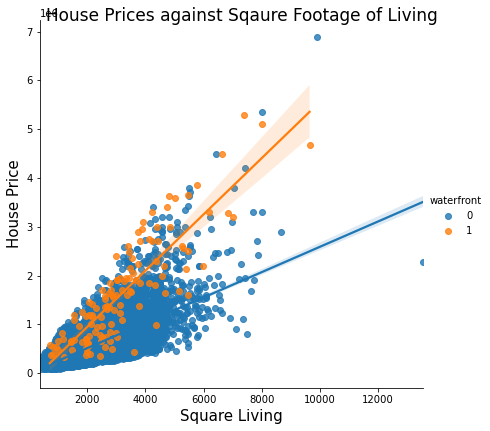

In [29]:
# lineplot between house price and swuare footage of living

plt.figure(figsize=(8,7))
sns.lmplot(x = "sqft_living", y = "price", data = KcHouse_sales,
           hue = "waterfront", height = 6)

plt.suptitle('House Prices against Sqaure Footage of Living', size=17)
plt.xlabel('Square Living', fontsize = 15)
plt.ylabel('House Price', fontsize = 15)

plt.show()


**Comments:**

I add a binary variable to see how the correlation between price and sqft_living will change. 0 indicates that a house has a waterfront view, and 1 means not. The steeper line of 1 demonstrates that waterfront properties' price is higher than a home without waterfront. As the living square footage increases, the price gap becomes more expansive. Simultaneously, the number of waterfront property is scarce, as the line of 1 is shorter and the samples labelled 1 have sparser aggregation than that of scatters labelled 0. That explains why people are willing to pay more for waterfront houses.



<Figure size 576x504 with 0 Axes>

Text(0.5, 0.98, 'House Prices against Overground House Sqaure Footage')

Text(0.5, 21.706249999999983, 'Square Above')

Text(24.009654017857144, 0.5, 'House Price')

<Figure size 576x504 with 0 Axes>

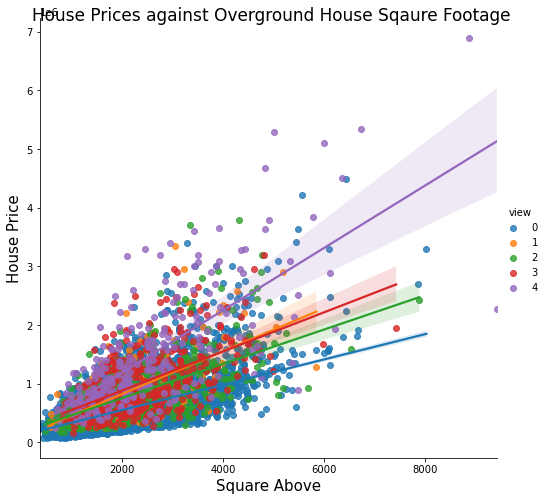

In [30]:
# line between house price and overground house square footage

plt.figure(figsize=(8,7))
sns.lmplot(x = "sqft_above", y = "price", data = KcHouse_sales,
           hue = "view", height = 7)

plt.suptitle('House Prices against Overground House Sqaure Footage', size=17)
plt.xlabel('Square Above', fontsize = 15)
plt.ylabel('House Price', fontsize = 15)

plt.show()

**Comments:**

This graph illustrates how better property view can affect the trend between sqft_above and house price. 0 to 4 represents how good the sight of a house is. The rising trend of four lines proves that the larger the overground house square footage, the more expensive the property with a better view. 

<Figure size 648x504 with 0 Axes>

Text(0.5, 0.98, 'House Prices against Bedroom Numbers')

Text(0.5, 0, 'Bedroom Numbers')

Text(0, 0.5, 'House Price')

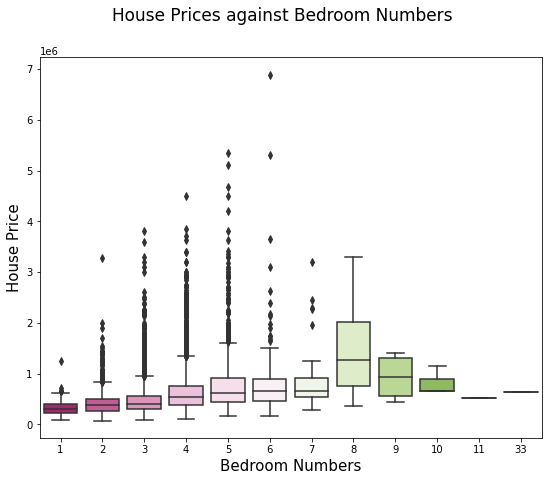

In [31]:
# correlation between house price and the number of bedroom

plt.figure(figsize=(9,7))
sns.boxplot(x = KcHouse_sales['bedrooms'], y=KcHouse_sales['price'], palette="PiYG")
plt.suptitle('House Prices against Bedroom Numbers', size=17)
plt.xlabel('Bedroom Numbers', fontsize = 15)
plt.ylabel('House Price', fontsize = 15) 

plt.show()

**Comments:**

We will create new attributes related to bedrooms and bathrooms, so we use a boxplot to present the price against these two features to explore further exploration further. The uptrend between price and the number of bedrooms reflects a weak positive correlation. Price stops growing after 8 bedrooms, possibly because 8 bedrooms are the maximised customer need per house. There are also outliers from 1 to 7. 

<Figure size 720x576 with 0 Axes>

Text(0.5, 0.98, 'House Prices against Bathroom Numbers')

Text(0.5, 0, 'Bathroom Numbers')

Text(0, 0.5, 'House Price')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

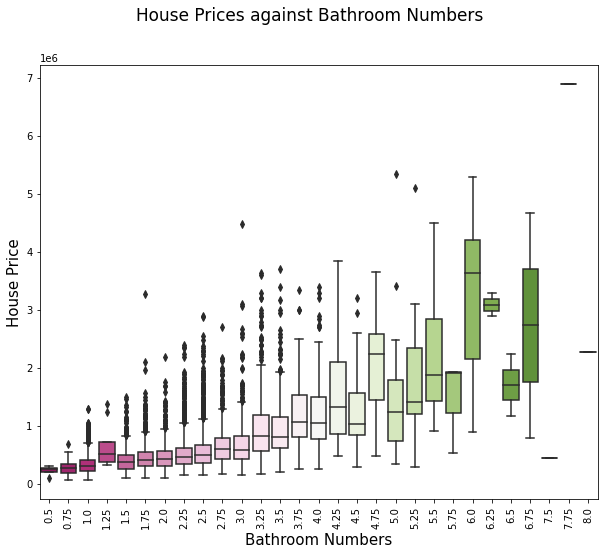

In [32]:
# correlation between price and the number of bathroom

plt.figure(figsize=(10,8))
sns.boxplot(x = KcHouse_sales['bathrooms'], y=KcHouse_sales['price'], palette="PiYG")
plt.suptitle('House Prices against Bathroom Numbers', size=17)
plt.xlabel('Bathroom Numbers', fontsize = 15)
plt.ylabel('House Price', fontsize = 15) 
plt.xticks(rotation = 90)

plt.show()

**Comments:**

The number of bathrooms has a stable, increasing trend, but the price starts to fluctuate after 4. There may be fewer houses that can contain bathrooms more than 4, creating dissatisfaction with customers and decreasing house popularity. Outliers assemble from 1 to 3.5.

Text(0.5, 0.98, 'House Price Scatter Plot Based on Zip Code')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

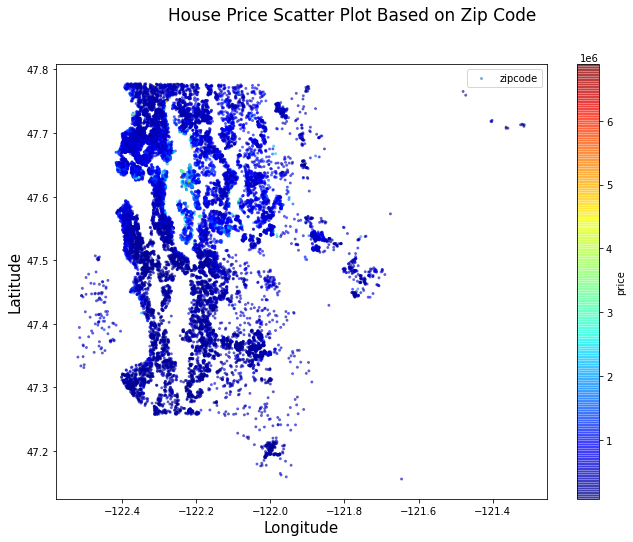

In [33]:
# scatter plot 

KcHouse_sales.plot(kind="scatter", x="long", y="lat", alpha=0.5,
    s=KcHouse_sales["zipcode"]/25000, label="zipcode", figsize=(11,8),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.suptitle('House Price Scatter Plot Based on Zip Code', size=17)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Latitude', fontsize = 15)

plt.show()



It is also interesting to have a look at variables that weakly correlate to price. The darker the colour, the denser the zip code, meaning more people are selling houses. Most points are clustered at a latitude from 47.3 to 47.5, but the higher space houses are more expensive. 



In [34]:
# create new attributes 

KcHouse_sales["sqft_living_per_bedroom"] = KcHouse_sales["sqft_living"]/KcHouse_sales["bedrooms"]
KcHouse_sales["sqft_living_per_bathroom"] = KcHouse_sales["sqft_living"]/KcHouse_sales["bathrooms"]
KcHouse_sales["sqft_living_on_sqft_lot"] = KcHouse_sales["sqft_living"]/KcHouse_sales["sqft_lot"]

In [35]:
# check the correlation between house price and new attributes

corr_matrix2 = KcHouse_sales.corr()
corr_matrix2["price"].sort_values(ascending=False)

price                       1.000000
sqft_living                 0.697566
grade                       0.670881
sqft_above                  0.601974
sqft_living15               0.589623
sqft_living_per_bedroom     0.579731
bathrooms                   0.522620
view                        0.406163
sqft_basement               0.319226
lat                         0.310889
bedrooms                    0.306704
sqft_living_per_bathroom    0.278833
waterfront                  0.267510
floors                      0.255906
sqft_living_on_sqft_lot     0.128416
yr_renovated                0.122174
sqft_lot                    0.092686
sqft_lot15                  0.083139
yr_built                    0.055366
condition                   0.040149
long                        0.020586
id                         -0.019749
zipcode                    -0.051599
Name: price, dtype: float64

Text(0.5, 0.98, 'New Attributes Scatter Plots')

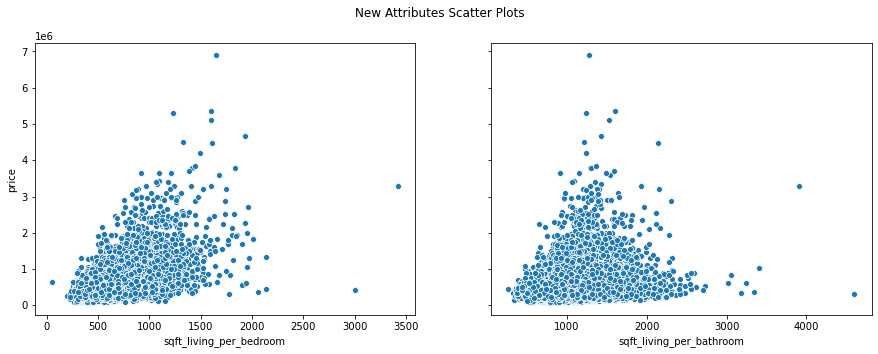

In [36]:
# scatter plots of new attributes 

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('New Attributes Scatter Plots')

# sqft_living_per_bedroom
sns.scatterplot(ax=axes[0], data=KcHouse_sales, x="sqft_living_per_bedroom", y="price", alpha=1)

# sqft_living_per_bathroom
sns.scatterplot(ax=axes[1], data=KcHouse_sales, x="sqft_living_per_bathroom", y="price", alpha=1)


**Comments:**

sqft_living_per_bedroom and sqft_living_per_bathroom are more positively correlated than some original variables, so we will add them in later step and have a view of their scatter plots. 

# 5. Prepare the data

In [37]:
# remove redundant features and target variable 

KcHouse_sales = strat_train_set.drop(["id", "date", "yr_built", "yr_renovated", "zipcode", "price"], axis = 1)
KcHouse_sales_labels = strat_train_set["price"].copy()

In [38]:
# there is no missing value

sample_incomplete_rows = KcHouse_sales[KcHouse_sales.isnull().any(axis=1)].head()
sample_incomplete_rows

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15


In [39]:
# transfer the number in waterfront to "Yes" and "No"
# create datasets of numerical and categorical features

KcHouse_sales["waterfront"] = KcHouse_sales["waterfront"].map({0:"No", 1:"Yes"})
KcHouse_sales_num = KcHouse_sales.drop(["waterfront"], axis = 1)
KcHouse_sales_cate = KcHouse_sales[["waterfront"]]
KcHouse_sales_num.head()
KcHouse_sales_cate.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
11856,2,1.0,960,4000,1.0,0,3,6,960,0,47.5554,-122.267,1210,4000
1324,3,3.5,1810,1846,2.0,0,4,8,1440,370,47.6070,-122.305,1480,3600
2925,1,1.0,780,10235,1.5,0,3,6,780,0,47.7130,-121.315,930,10165
3234,5,4.0,4660,9900,2.0,2,4,9,2600,2060,47.5135,-122.200,3380,9900
16230,5,2.0,2280,5400,1.5,0,4,7,1340,940,47.6674,-122.279,1770,5000


,waterfront
11856,No
1324,No
2925,No
3234,No
16230,No


**Comments:**

The waterfront column has binary values that indicate if there is a view of the waterfront. To make the following analysis more explicit, I converted numbers 0 to "No" and 1 to "Yes."



In [40]:
# convert each categorical value to a one-hot vector

cat_encoder = OneHotEncoder()
KcHouse_sales_cate_hot = cat_encoder.fit_transform(KcHouse_sales_cate)
KcHouse_sales_cate_hot
KcHouse_sales_cate_hot.toarray()[:5]

<17277x2 sparse matrix of type '<class 'numpy.float64'>'
	with 17277 stored elements in Compressed Sparse Row format>

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [41]:
cat_encoder.categories_ 

[array(['No', 'Yes'], dtype=object)]

In [42]:
# add two new attributes 

sqft_living_ix, bedroom_ix, bathroom_ix = [
    list(KcHouse_sales.columns).index(col)
    for col in ("sqft_living", "bedrooms", "bathrooms")]

class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, sqft_living_per_bedroom = True):
        self.sqft_living_per_bedroom = sqft_living_per_bedroom 
    def fit(self, X, y=None):
        return self  
    def transform(self, X):
        sqft_living_per_bathroom = X[:, sqft_living_ix] / X[:, bathroom_ix]
        if self.sqft_living_per_bedroom:
            sqft_living_per_bedroom = X[:, sqft_living_ix]/X[:, bedroom_ix]
            return np.c_[X, sqft_living_per_bedroom, sqft_living_per_bathroom] 
        else:
            return np.c[X, sqft_living_per_bedroom]
    
attr_adder = CustomAttrAdder(sqft_living_per_bedroom=True)
KcHouse_sales_extra_attrs = attr_adder.transform(KcHouse_sales.values)
KcHouse_sales_extra_attrs  

array([[2, 1.0, 960, ..., 4000, 480.0, 960.0],
       [3, 3.5, 1810, ..., 3600, 603.3333333333334, 517.1428571428571],
       [1, 1.0, 780, ..., 10165, 780.0, 780.0],
       ...,
       [3, 3.5, 3250, ..., 6000, 1083.3333333333333, 928.5714285714286],
       [4, 1.75, 1870, ..., 10185, 467.5, 1068.5714285714287],
       [5, 2.75, 2040, ..., 7488, 408.0, 741.8181818181819]], dtype=object)

In [43]:
KcHouse_sales_extra_attrs = pd.DataFrame(
    KcHouse_sales_extra_attrs,
    columns=list(KcHouse_sales.columns)+["sqft_living_per_bedroom", "sqft_living_per_bathroom"],
    index=KcHouse_sales.index)
KcHouse_sales_extra_attrs.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,sqft_living_per_bedroom,sqft_living_per_bathroom
11856,2,1,960,4000,1,No,0,3,6,960,0,47.5554,-122.267,1210,4000,480,960
1324,3,3.5,1810,1846,2,No,0,4,8,1440,370,47.607,-122.305,1480,3600,603.333,517.143
2925,1,1,780,10235,1.5,No,0,3,6,780,0,47.713,-121.315,930,10165,780,780
3234,5,4,4660,9900,2,No,2,4,9,2600,2060,47.5135,-122.2,3380,9900,932,1165
16230,5,2,2280,5400,1.5,No,0,4,7,1340,940,47.6674,-122.279,1770,5000,456,1140


In [44]:
# Create a class to select numerical or categorical columns 

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    

In [45]:
# create pipeline to add functions together 

num_attribs = list(KcHouse_sales_num)
cat_attribs = ["waterfront"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('attribs_adder', CustomAttrAdder()),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
        
    ])

Compared with MaxMixScaler, StandardScaler gives a more accurate prediction than translating all the features into a given range [-1,1].

In [46]:
# final pipeline

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [47]:
# new training dataset

KcHouse_sales_prepared = full_pipeline.fit_transform(KcHouse_sales)
KcHouse_sales_prepared

array([[-1.46954142, -1.44947875, -1.22425853, ..., -0.155168  ,
         1.        ,  0.        ],
       [-0.39713309,  1.80015394, -0.29403115, ..., -1.66426135,
         1.        ,  0.        ],
       [-2.54194974, -1.44947875, -1.42124785, ..., -0.76854143,
         1.        ,  0.        ],
       ...,
       [-0.39713309,  1.80015394,  1.28188348, ..., -0.26226495,
         1.        ,  0.        ],
       [ 0.67527523, -0.47458894, -0.22836804, ...,  0.21480327,
         1.        ,  0.        ],
       [ 1.74768355,  0.82526413, -0.04232256, ..., -0.89865094,
         1.        ,  0.        ]])

In [48]:
KcHouse_sales_prepared.shape

(17277, 18)

**Comments:**

I try to implement the principal component analysis with the 11 components covering 95% variance to reduce the data dimensionality because 18 features seem too big. However, the root means squared errors become larger, indicating further distances between the observed data and predicted value, and the models' accuracies drop after fine tune. Features may become less interpretable in lower dimensionality, and essential information is lost. Therefore, PCA was not necessary in this case.

# 6. Model Training 

In [49]:
# codes for the identical format of each model's outputs and easy comparisons

models_rmse = [] # Holds Models original RMSE
cvs_rmse_mean = [] # Holds the Cross Validation RMSE 
models = [] # Holds the models name

def display_model_performance(model_name, model, KcHouse_sales_prepared = KcHouse_sales_prepared, 
                              KcHouse_sales_labels = KcHouse_sales_labels,
                              models_rmse = models_rmse,
                              cvs_rmse_mean = cvs_rmse_mean, cv = True):
    
    model.fit(KcHouse_sales_prepared, KcHouse_sales_labels)
    
    predictions = model.predict(KcHouse_sales_prepared)
    
    model_mse = mean_squared_error(KcHouse_sales_labels, predictions)
    model_rmse = np.sqrt(model_mse)
    model_mae = mean_absolute_error(KcHouse_sales_labels, predictions)
    
    cv_score = cross_val_score(model, KcHouse_sales_prepared, KcHouse_sales_labels, 
                               scoring = "neg_mean_squared_error", cv = 5)
    cv_rmse = np.sqrt(-cv_score)
    cv_stand_dev = cv_rmse.std()
    cv_rmse_mean = cv_rmse.mean()
    
    print("RMSE: %.4f" %model_rmse)
    models_rmse.append(model_rmse)
    
    print("RAE: %.4f" %model_mae)
    
    print("CV-SCORE:", cv_rmse)
    print("CV-STANDARD_DEVIATION: %.4f" %cv_stand_dev)

    
    print("CV-RMSE: %.4f" %cv_rmse_mean)
    cvs_rmse_mean.append(cv_rmse_mean)
    
    models.append(model_name)
    
    plt.scatter(KcHouse_sales_labels, model.predict(KcHouse_sales_prepared))
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    x_lim = plt.xlim()
    y_lim = plt.ylim()
    plt.plot(x_lim, y_lim, "k--")
    plt.show()

RMSE: 203528.3566
RAE: 128859.6105
CV-SCORE: [203773.25763843 214149.16123201 198686.49802515 203306.64887621
 204680.24406298]
CV-STANDARD_DEVIATION: 5059.8293
CV-RMSE: 204919.1620


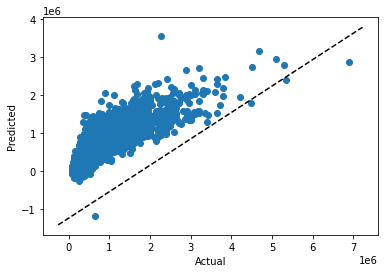

In [50]:
lin_reg = LinearRegression(normalize = True)
display_model_performance("Linear Regression", lin_reg)

RMSE: 9685.4198
RAE: 921.7676
CV-SCORE: [193001.79407417 195205.13670999 179080.66272236 173204.24489643
 188565.31075146]
CV-STANDARD_DEVIATION: 8387.7442
CV-RMSE: 185811.4298


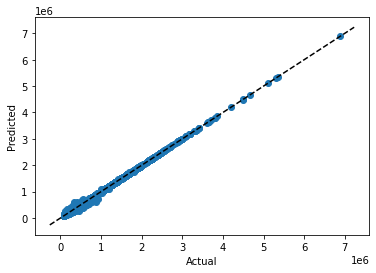

In [51]:
tree_reg = DecisionTreeRegressor(random_state = 42)
display_model_performance("Decision Tree Regression", tree_reg)

RMSE: 58323.7550
RAE: 30512.4531
CV-SCORE: [129924.40532637 152409.62073534 131208.22833294 132558.28406533
 159301.73393274]
CV-STANDARD_DEVIATION: 12287.4790
CV-RMSE: 141080.4545


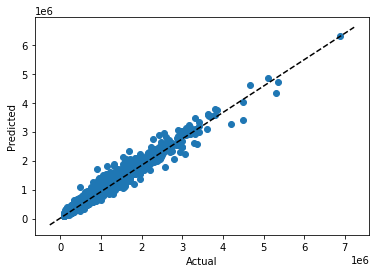

In [52]:
forest_reg = RandomForestRegressor(n_estimators = 10, random_state = 42)
display_model_performance("Random Forest Regression", forest_reg)

RMSE: 436437.7920
RAE: 412828.1960
CV-SCORE: [450678.39539303 365538.63562107 419447.3106546  412821.80389729
 445509.73187072]
CV-STANDARD_DEVIATION: 30339.9823
CV-RMSE: 418799.1755


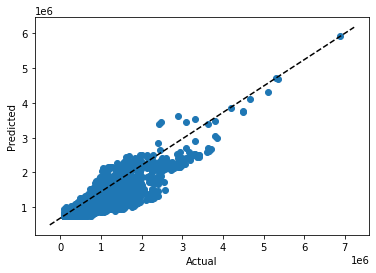

In [53]:
ada_reg = AdaBoostRegressor(n_estimators = 100)
display_model_performance("AdaBoost Regression", ada_reg)

RMSE: 181962.3004
RAE: 105448.6779
CV-SCORE: [185215.34634171 201425.85617824 177123.26087956 178701.2938443
 193107.16020558]
CV-STANDARD_DEVIATION: 9109.7813
CV-RMSE: 187114.5835


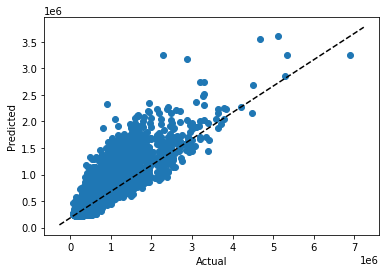

In [54]:
grad_reg = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1,
                                     max_depth = 1, random_state = 42, loss = 'ls')
display_model_performance("GradientBoosting Regression", grad_reg)

RMSE: 338145.2948
RAE: 195589.5566
CV-SCORE: [337450.70563462 365231.71620348 327816.34353937 337776.69755041
 349927.59325051]
CV-STANDARD_DEVIATION: 12874.8578
CV-RMSE: 343640.6112


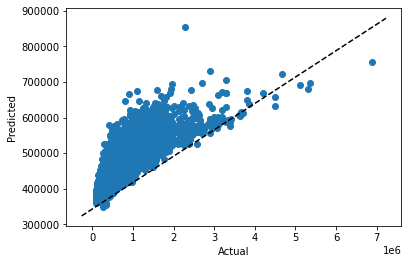

In [55]:
svm_reg = SVR(kernel="linear")
display_model_performance("Support Vector Regression", svm_reg)

In [56]:
model_compare = pd.DataFrame({"Models": models, "Models RMSE": models_rmse,
                               "CV RMSE Mean": cvs_rmse_mean,})
model_compare.sort_values(by = "Models RMSE", ascending = True)

,Models,Models RMSE,CV RMSE Mean
1,Decision Tree Regression,9685.419810,185811.429831
2,Random Forest Regression,58323.755038,141080.454479
4,GradientBoosting Regression,181962.300388,187114.583490
0,Linear Regression,203528.356619,204919.161967
5,Support Vector Regression,338145.294754,343640.611236
3,AdaBoost Regression,436437.792023,418799.175487


**Comments:**

Decision tree regression and random forest regression have smaller random mean square errors that demonstrate the predictions are more accurate than other models. The linear charts also show the better absolute fits to the line that these two algorithms have. 



# 7. Fine-Tune the System

In [57]:
# fine tune decision tree regression

params = {'max_leaf_nodes': list(range(2, 120)), 'min_samples_split': [2, 3, 4]
         }
grid_search_cv = GridSearchCV(tree_reg, params, n_jobs=-1, verbose=1, cv=3)

grid_search_cv.fit(KcHouse_sales_prepared, KcHouse_sales_labels)


Fitting 3 folds for each of 354 candidates, totalling 1062 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1062 out of 1062 | elapsed:  1.0min finished


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [58]:
# best parameters 

grid_search_cv.best_params_
grid_search_cv.best_estimator_

{'max_leaf_nodes': 119, 'min_samples_split': 4}

DecisionTreeRegressor(max_leaf_nodes=119, min_samples_split=4, random_state=42)

In [59]:
# finally train the model on test set

final_model = grid_search_cv.best_estimator_

X_test = strat_test_set.drop(["id", "date", "yr_built", "yr_renovated", "zipcode", "price"], axis=1)
X_test["waterfront"] = X_test["waterfront"].map({0:"No", 1:"Yes"})
y_test = strat_test_set["price"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [60]:
# rmse and prediction accuracy

final_rmse
final_model.score(X_test_prepared, y_test)

172048.42598110298

0.8083234695183918

In [61]:
# codes for feature importance

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [62]:
feature_importances = grid_search_cv.best_estimator_.feature_importances_
feature_importances

array([0.        , 0.01447473, 0.23381116, 0.00484389, 0.00169798,
       0.00345941, 0.        , 0.41062575, 0.01157311, 0.        ,
       0.18359515, 0.06551536, 0.02447243, 0.00299785, 0.00458367,
       0.00295428, 0.00600318, 0.02939206])

In [63]:
# show features sort by importance

extra_attribs = ["sqft_living_per_bedroom", "sqft_living_per_bathroom"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.41062574869665497, 'grade'),
 (0.23381116309374933, 'sqft_living'),
 (0.18359514939640675, 'lat'),
 (0.0655153600675774, 'long'),
 (0.029392055266648332, 'Yes'),
 (0.024472430691937802, 'sqft_living15'),
 (0.0144747271948864, 'bathrooms'),
 (0.011573107374673425, 'sqft_above'),
 (0.006003177706136894, 'No'),
 (0.0048438865280316405, 'sqft_lot'),
 (0.004583669878091378, 'sqft_living_per_bedroom'),
 (0.0034594116718451836, 'view'),
 (0.0029978505033640686, 'sqft_lot15'),
 (0.0029542807207869645, 'sqft_living_per_bathroom'),
 (0.0016979812092095137, 'floors'),
 (0.0, 'sqft_basement'),
 (0.0, 'condition'),
 (0.0, 'bedrooms')]

In [64]:
# fine tune random forest regression

param_grid = [
    {'n_estimators': [2, 14, 25], 'max_features': [2, 5, 7, 11]},
    {'bootstrap': [False], 'n_estimators': [2, 14], 'max_features': [2, 4, 6]},
    ]
    
forest_reg = RandomForestRegressor(n_estimators = 10, random_state = 42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(KcHouse_sales_prepared, KcHouse_sales_labels)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=10, random_state=42),
             param_grid=[{'max_features': [2, 5, 7, 11],
                          'n_estimators': [2, 14, 25]},
                         {'bootstrap': [False], 'max_features': [2, 4, 6],
                          'n_estimators': [2, 14]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [65]:
# best parameters

grid_search.best_params_
grid_search.best_estimator_

{'max_features': 11, 'n_estimators': 25}

RandomForestRegressor(max_features=11, n_estimators=25, random_state=42)

In [66]:
# finally train the model on test set

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop(["id", "date", "yr_built", "yr_renovated", "zipcode", "price"], axis=1)
X_test["waterfront"] = X_test["waterfront"].map({0:"No", 1:"Yes"})
y_test = strat_test_set["price"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [67]:
# rmse and prediction accuracy

final_rmse
final_model.score(X_test_prepared, y_test)

141897.18872233064

0.8696187577217591

In [68]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.00287629, 0.02104915, 0.23819812, 0.01564921, 0.00298065,
       0.01556345, 0.00514905, 0.2684438 , 0.04402319, 0.00700395,
       0.16599117, 0.08262933, 0.05900538, 0.01590534, 0.01253449,
       0.01323072, 0.0145169 , 0.0152498 ])

In [69]:
# show features sort by importance

extra_attribs = ["sqft_living_per_bedroom", "sqft_living_per_bathroom"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.26844379769973054, 'grade'),
 (0.23819812204743815, 'sqft_living'),
 (0.16599117467495153, 'lat'),
 (0.08262933296100472, 'long'),
 (0.05900538024456782, 'sqft_living15'),
 (0.044023187627935764, 'sqft_above'),
 (0.021049152830599674, 'bathrooms'),
 (0.01590533828491335, 'sqft_lot15'),
 (0.015649210771275863, 'sqft_lot'),
 (0.015563445153519113, 'view'),
 (0.015249795164974857, 'Yes'),
 (0.014516900400901252, 'No'),
 (0.013230724286540319, 'sqft_living_per_bathroom'),
 (0.01253448680397604, 'sqft_living_per_bedroom'),
 (0.007003952338571501, 'sqft_basement'),
 (0.005149054945733481, 'condition'),
 (0.0029806490604668955, 'floors'),
 (0.002876294702899156, 'bedrooms')]

# 8. Conclusion

The best predictive is random forest regression with the random square error of 141897 and a testing score of 86.96%. Although the decision tree has a smaller random mean square error, its highest testing accuracy is 80.82% after multiple fine tunings. 

The top 4 most essential features for house pricing selected by the two models are the same. We can conclude that people set up house prices considering more on the effects of grade rating, square footage of living, latitude, and longitude in King County, Washington.



# Reference

Statista. 2021. Existing home sales in the U.S. 2005-2021 | Statista. [online] Available at: <https://www.statista.com/statistics/226144/us-existing-home-sales/> [Accessed 7 March 2021].

# Appendix

| **Variable  Names**           | **Contents**                                             |
| :-----------------------------: | :-------------------------------------------------------- |
| id                            | Identification                                                   |
| date                          | Date sold                                                        |
| price	                        | Sale price                                                       |
| bedrooms	                    | Number of bedrooms                                               |
| bathrooms	                    | Number of bathrooms                                              |
| sqft_living	                    | Size of living area in square feet                               |
| sqft_lot	                    | Size of the lot in square feet                                   |
| floors	                    | Number of floorse                                                |
| waterfront		            | ‘1’ if the property has a waterfront, ‘0’ if not.                |
| view		                    | An index from 0 to 4 of how good the view of the property was    |
| condition	                    | Condition of the house, ranked from 1 to 5                       |
| grade	                        | Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. Additional information in: KingCounty	                          |
| sqft_above	                | Square feet above ground                                         |
| sqft_basement                      | Square feet below ground                                         |
| yr_built                      | Year built	                                                   |
| yr_renovated		                | Year renovated. ‘0’ if never renovated                           |
| zipcode	                    | 5 digit zip code                                                 |
| lat		                    | Latitude                                                         |
| long	                        | Longitude	                                                       |
| squft_living15	                | Average size of interior housing living space for the closest 15 houses, in square feet	                                               |
| squft_lot15		            | Average size of land lost for the closest 15 houses, in square feet	               |


# Repository Link

https://ucl.my.faculty.ai/project/3594a6d9-23a8-43fa-910b-fd30b6c9d06c/workspace